## esp 32: 주로 통신용으로 사용
- 시리얼 비긴 115200 으로 바꾸기

In [ ]:
nt ledPin = 18, ledPin2 = 19;

void setup() {
  pinMode(ledPin, OUTPUT);
  pinMode(ledPin2, OUTPUT);
  ledcSetup(0, 5000, 10); // ch, freq, resolution
  ledcAttachPin(ledPin, 0);
  ledcAttachPin(ledPin2, 0);
}

void loop() {
  ledcWrite(0, 0);
  delay(1000);

  ledcWrite(0, 512);
  delay(1000);

  ledcWrite(0, 1023);
  delay(1000);

}

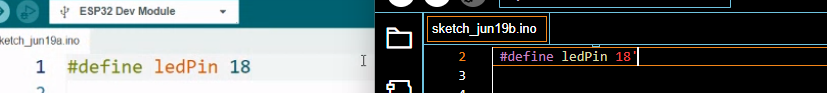

In [ ]:
void setup() {
 #define ledPin 18
 #define button 26
 
 
  // put your setup code here, to run once:
  pinMode(18,OUTPUT);
  pinMode(button, INPUT);
  Serial.begin(115200);
}

void loop() {
  // put your main code here, to run repeatedly:
  int butsensorvalue = digitalRead(button);
  Serial.println(butsensorvalue);
  delay(10);
  if(butsensorvalue==1){
    digitalWrite(18,1);
  }else {
    digitalWrite(18,0);}
 
}

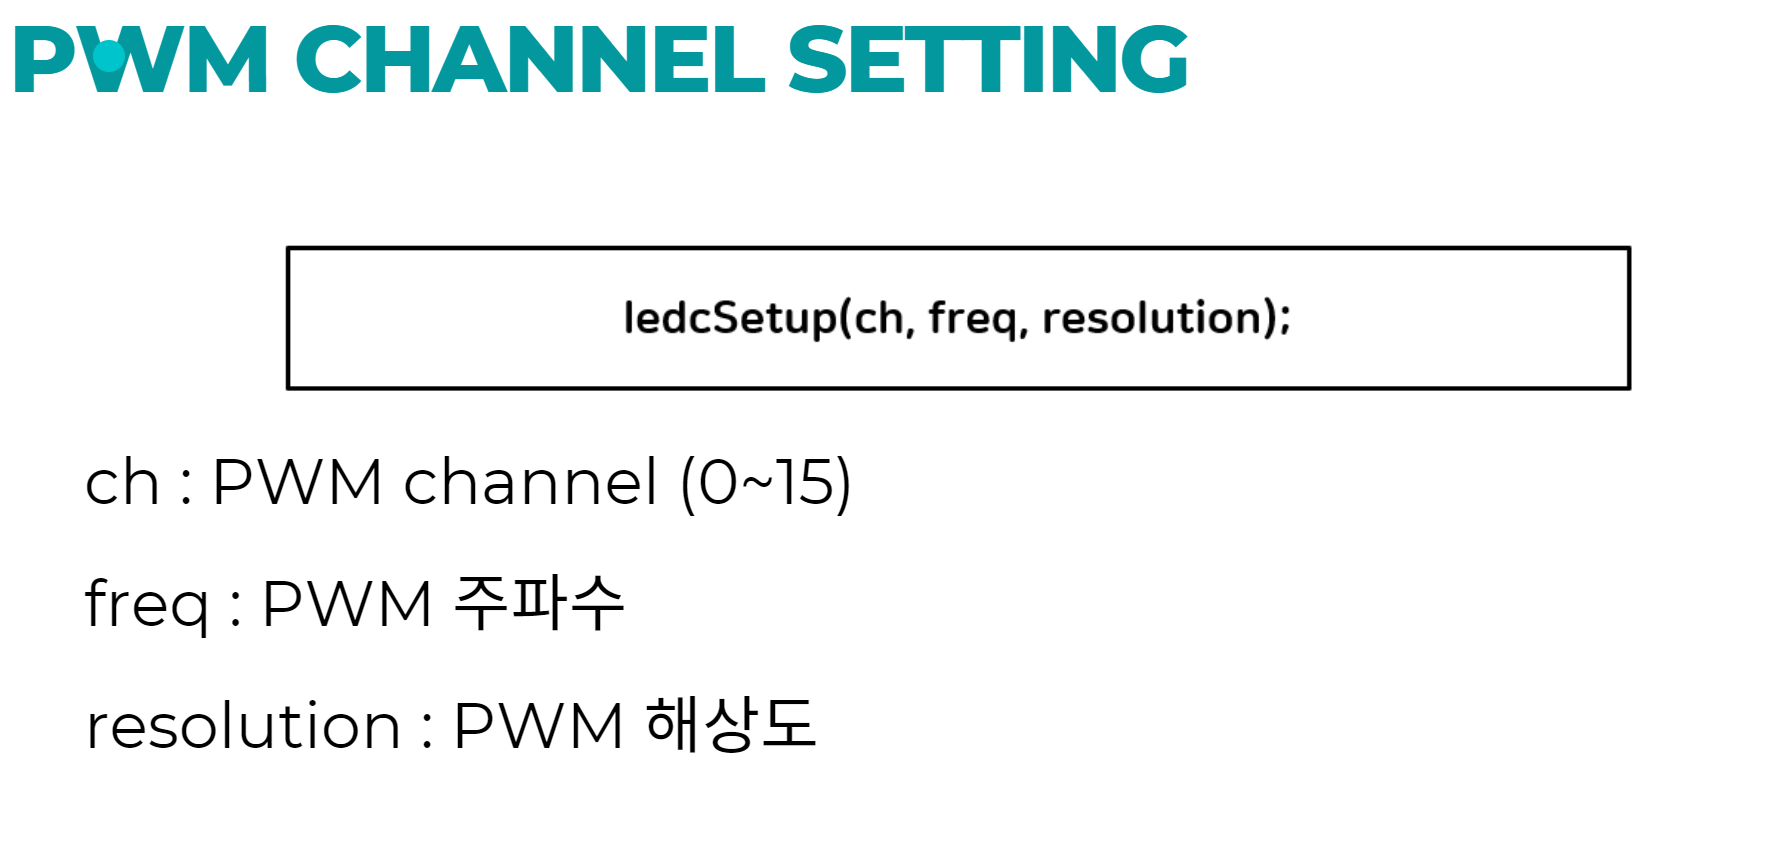

In [ ]:
int ledPin = 18, ledPin2 = 19;

void setup() {
  pinMode(ledPin, OUTPUT);
  pinMode(ledPin2, OUTPUT);
  ledcSetup(0, 5000, 10); // ch, freq, resolution
  ledcAttachPin(ledPin, 0);
  ledcAttachPin(ledPin2, 0);
}

void loop() {
  ledcWrite(0, 0);
  delay(1000);

  ledcWrite(0, 512);
  delay(1000);

  ledcWrite(0, 1023);
  delay(1000);

}

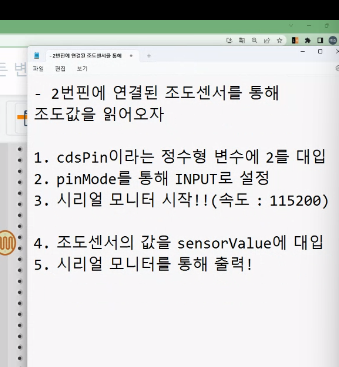

In [ ]:
int cdsPin = 2;

void setup() {
  pinMode(cdsPin, INPUT);
  Serial.begin(115200);
}

void loop() {
  int sensorValue = analogRead(cdsPin);
  Serial.println(sensorValue);
  delay(100);
}

In [ ]:
#include "BluetoothSerial.h"

#if !defined(CONFIG_BT_ENABLED) || !defined(CONFIG_BLUEDROID_ENABLED)
#error Bluetooth is not enabled! Please run `make menuconfig` to and enable it
#endif

BluetoothSerial SerialBT;

void setup() {
  Serial.begin(115200);
  SerialBT.begin("ESP32nayeho"); //Bluetooth device name
  Serial.println("The device started, now you can pair it with bluetooth!");
}

void loop() {
  if (Serial.available()) {
    SerialBT.write(Serial.read());
  }
  if (SerialBT.available()) {

    char c = SerialBT.read();
    // 핸드폰 블루투스쪽에서 '1'을 보내면
    // 18번핀에 연결된 LED ON
    // '0' 보내면 LED OFF

    Serial.println(c);

  }
  delay(20);
}

- 통신을 시작
- 통신해서 받은게 있으면 그것을 읽어서 write 한다
- 터미널 옵션이 총 4가지 no line
- 문자의 끝을 알려주기 윟 문자의끝에 붙는 기로
- 새줄 역슬래시 엔
- 캐리지리턴 역슬래시 r
- 라인엔딩없음은 그냥 계속 나감 다른거랑 할때는 끝에 붙는것이 좋음

- 어떤게 문자열읹 ㅣ모르니까 이거ㅓㄹ 사용하면 \그냥 뒤에 오는것의 ㅣ기능을 쓰지않고 단순히 문자열로 구분

- 유동적으로 쓸수 있는 공간을 만들고 그 공간을 동적으로 사용해주는 다이나믹 버퍼
- 이 버퍼 중에서 제이슨 데이터 다룰 공간이여서 제이슨
- DynamicJsonBuffer jsonBuffer;

In [ ]:
string name = root["name"]

In [ ]:
#include <ArduinoJson.h>
String data = "{\"name\":\"nayeho\"}";
void setup() {
  Serial.begin(115200);
}
void loop() {
  // AruinoJson 라이브러리 사용하는 법
  // 1. 라이브러리 추가!!
  // 2. Json Data를 다룰 공간을 만들어주자
  DynamicJsonBuffer jsonBuffer;
  // 3. 변환할 데이터를 jsonBuffer에 넣자!!
  JsonObject& root = jsonBuffer.parseObject(data);
  String name = root["name"];
  Serial.println(name);
  delay(1000);
}

In [ ]:
#include <WiFi.h>
#include <HTTPClient.h>

const char* ssid = "iptime"; // WIFI ID
const char* password = ""; // WIFI PW

// Server 요청 주소
String address = "주소";

String result = ""; // 응답 결과 저장
HTTPClient http; // 통신 객체

void setup() {
  Serial.begin(115200); // Baud rate

  WiFi.begin(ssid, password);
  while (WiFi.status() != WL_CONNECTED) {
    delay(1000);
    Serial.println("Connecting to WiFi..");
  }

  Serial.println("Connected to the WiFi network");
}

void loop() {
  if ((WiFi.status() == WL_CONNECTED)) { //Check the current connection status

    http.begin(address);

    int httpCode = http.GET(); // 응답코드
    if (httpCode > 0) {

      Serial.println(httpCode); // 응답코드 출력
      result = http.getString(); // 응답 결과 저장
      Serial.println(result); // 응답 결과 출력

    }


    http.end(); //Free the resources
  } else {
    Serial.println("Error on HTTP request");
  }
  delay(500);
}

In [ ]:
// 0 번 jdon관련 라이브러리 추가
      // 1. result를 JSON 형태로 변환!!
      //1)Json을 다룰 수 있는 공간을 만들고 그 공간에 result넣기
        DynamicJsonBuffer JsonBuffer;
        JsonObject& root = JsonBuffer.parseObject(result);
        JsonObject& main = root["main"];
        //풍속이 들어잇는  wind 라는 데이터 파일에 들어가기 위해 오브젝트 만듬 출발할 수 있는 길
        JsonObject& wind = root["wind"];


      // 2. main 키로 접근 -> JSON 타입으로 저장
      // 3. temp 키로 접근 -> float 타입으로 저장
        float temp = main["temp"];
        Serial.print("temp : ");
        Serial.println(temp);
        
        //습도 구하기
        //변수에 저장하고 출력하기
        int humidity = main["humidity"];
        Serial.print("humidity: ");
        Serial.println(humidity);
        //풍속 구하기
        float speed = wind["speed"];
        //풍속 출
        Serial.print("speed : ");
        Serial.println(speed);





    }


    http.end(); //Free the resources
  } else {
    Serial.println("Error on HTTP request");
  }
  delay(500);
}

In [ ]:
#include <ArduinoJson.h>


#include <WiFi.h>
#include <HTTPClient.h>

const char* ssid = "what’s good"; // WIFI ID
const char* password = "010127js"; // WIFI PW

// Server 요청 주소
String address = "http://api.openweathermap.org/data/2.5/weather?q=Gwangju&appid=b7bf397fc41c80002f516c220ec34b9a&units=metric";

String result = ""; // 응답 결과 저장
HTTPClient http; // 통신 객체

void setup() {
  Serial.begin(115200); // Baud rate

  WiFi.begin(ssid, password);
  while (WiFi.status() != WL_CONNECTED) {
    delay(1000);
    Serial.println("Connecting to WiFi..");
  }

  Serial.println("Connected to the WiFi network");
}

void loop() {
  if ((WiFi.status() == WL_CONNECTED)) { //Check the current connection status

    http.begin(address);

    int httpCode = http.GET(); // 응답코드
    if (httpCode > 0) {

      //Serial.println(httpCode); // 응답코드 출력
      result = http.getString(); // 응답 결과 저장
      //Serial.println(result); // 응답 결과 출력

      // 0 번 jdon관련 라이브러리 추가
      // 1. result를 JSON 형태로 변환!!
      //1)Json을 다룰 수 있는 공간을 만들고 그 공간에 result넣기
        DynamicJsonBuffer JsonBuffer;
        JsonObject& root = JsonBuffer.parseObject(result);
        JsonObject& main = root["main"];
        //풍속이 들어잇는  wind 라는 데이터 파일에 들어가기 위해 오브젝트 만듬 출발할 수 있는 길
        JsonObject& wind = root["wind"];
        JsonArray& weather = root["weather"];


      // 2. main 키로 접근 -> JSON 타입으로 저장
      // 3. temp 키로 접근 -> float 타입으로 저장
        float temp = main["temp"];
        Serial.print("temp : ");
        Serial.println(temp);
        
        //습도 구하기
        //변수에 저장하고 출력하기
        int humidity = main["humidity"];
        Serial.print("humidity: ");
        Serial.println(humidity);
        //풍속 구하기
        float speed = wind["speed"];
        //풍속 출력
        Serial.print("speed : ");
        Serial.println(speed);

        // 현재 날씨 출력
        //weather에서 가져온 0번인덱스 제이슨배열을 weather_one로 바꾸기
        JsonObject& weather_one = weather[0];
        //이 weather_one의 main가져올거를 문자열 weather_main이라는 함수에 저장하고 출력
        String weather_main  =  weather_one["main"];
        Serial.print("weather :");
        Serial.print(weather_main);



    }


    http.end(); //Free the resources
  } else {
    Serial.println("Error on HTTP request");
  }
  delay(500);